Saving D3.csv to D3.csv

[α sweep for multivariate model (x1, x2, x3)]
alpha=0.1     final J=0.738464  theta=[5.313936, -2.003687, 0.532602, -0.265568]
alpha=0.05    final J=0.738530  theta=[5.279070, -1.998761, 0.538363, -0.260457]
alpha=0.02    final J=0.764987  theta=[4.608544, -1.904038, 0.649163, -0.162172]
alpha=0.01    final J=0.933784  theta=[3.399297, -1.733206, 0.848983, 0.015074]


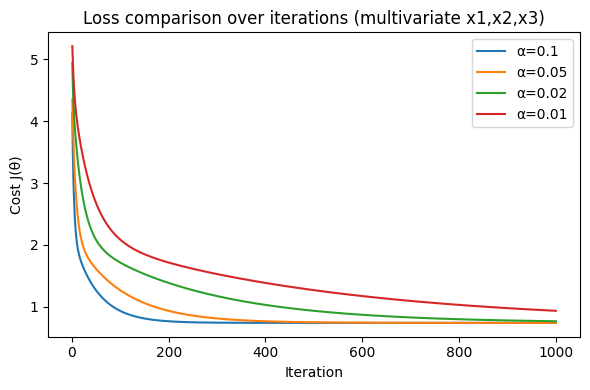


=== Best multivariate model ===
Best α: 0.1
Linear model:  Y ≈ 5.313936 + -2.003687·x1 + 0.532602·x2 + -0.265568·x3
Final cost J:  0.738464

Predictions with best model:
x=(np.int64(1), np.int64(1), np.int64(1)) -> y ≈ 3.5773
x=(np.int64(2), np.int64(0), np.int64(4)) -> y ≈ 0.2443
x=(np.int64(3), np.int64(2), np.int64(1)) -> y ≈ 0.1025


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()
data = pd.read_csv("D3.csv")

x1 = data.iloc[:, 0].to_numpy(dtype=float)
x2 = data.iloc[:, 1].to_numpy(dtype=float)
x3 = data.iloc[:, 2].to_numpy(dtype=float)
y  = data.iloc[:, 3].to_numpy(dtype=float)

# Helpers
def design_matrix_multi(x1, x2, x3):
    x1 = x1.astype(float)
    x2 = x2.astype(float)
    x3 = x3.astype(float)
    return np.c_[np.ones_like(x1), x1, x2, x3]   # shape (m, 4): [1, x1, x2, x3]

def compute_cost(X, y, theta):
    m = len(y)
    errors = X.dot(theta) - y
    return (1.0 / (2 * m)) * np.dot(errors, errors)

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    J_hist = np.zeros(iterations)
    for i in range(iterations):
        predictions  = X.dot(theta)
        errors = predictions - y
        theta -= (alpha / m) * (X.T.dot(errors))
        J_hist[i] = compute_cost(X, y, theta)
    return theta, J_hist

alphas = [0.1, 0.05, 0.02, 0.01]
iterations = 1000

X = design_matrix_multi(x1, x2, x3)
best = None
per_alpha = []

for a in alphas:
  theta0 = np.zeros(X.shape[1])
  theta, J_hist = gradient_descent(X, y, theta0, a, iterations)
  final_cost = J_hist[-1]

  per_alpha.append((a, final_cost, theta, J_hist))
  if best is None or final_cost < best["final_cost"]:
      best = {"theta": theta, "alpha": a, "J_hist": J_hist, "final_cost": final_cost}

      # ---- A) Per-α table (multivariate) ----
print("\n[α sweep for multivariate model (x1, x2, x3)]")
for a, Jf, th, _ in per_alpha:
    print(f"alpha={a:<6}  final J={Jf:.6f}  theta=[{th[0]:.6f}, {th[1]:.6f}, {th[2]:.6f}, {th[3]:.6f}]")

# ---- B) Overlay loss curves for all α ----
plt.figure(figsize=(6,4))
for a, Jf, th, J_hist in per_alpha:
    plt.plot(np.arange(1, len(J_hist)+1), J_hist, label=f"α={a}")
plt.title("Loss comparison over iterations (multivariate x1,x2,x3)")
plt.xlabel("Iteration"); plt.ylabel("Cost J(θ)")
plt.legend(); plt.tight_layout(); plt.show()

# ---- Report best model ----
theta, a, J_hist = best["theta"], best["alpha"], best["J_hist"]
print(f"\n=== Best multivariate model ===")
print(f"Best α: {a}")
print(f"Linear model:  Y ≈ {theta[0]:.6f} + {theta[1]:.6f}·x1 + {theta[2]:.6f}·x2 + {theta[3]:.6f}·x3")
print(f"Final cost J:  {best['final_cost']:.6f}")

# ----Predictions for new points ----
theta_best = best["theta"]

# New input points
new_points = np.array([
    [1, 1, 1],   # (x1, x2, x3)
    [2, 0, 4],   # (x1, x2, x3)
    [3, 2, 1]    # (x1, x2, x3)
])

X_new = np.c_[np.ones(new_points.shape[0]), new_points]

# Predictions
y_pred = X_new.dot(theta_best)

print("\nPredictions with best model:")
for point, pred in zip(new_points, y_pred):
    print(f"x={tuple(point)} -> y ≈ {pred:.4f}")